# Augmentation

Augmentation for MRI has its limitaions, as 

In [138]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetV2S
from tensorflow.keras.regularizers import l2

import functions
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(18)

In [139]:
from tensorflow import cast, image, numpy_function

In [140]:
# Set image size
image_size = 240

Found 5121 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.


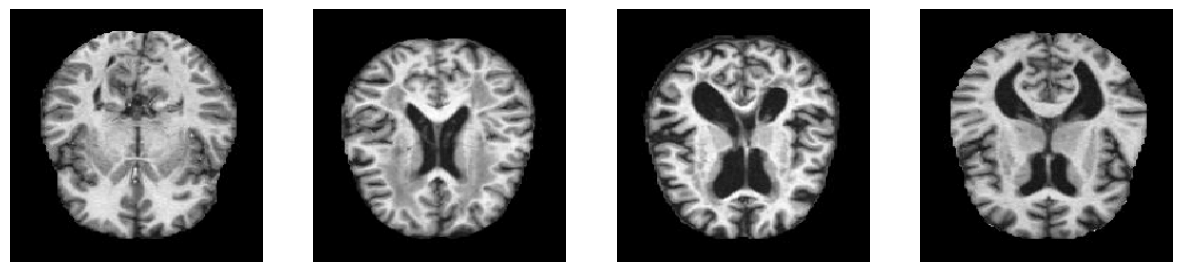

In [29]:
al_train_dg = datagen.flow_from_directory(
                  directory='../data/alzheimer/train',
                  target_size=(image_size, image_size), # resize to this size
                  color_mode="grayscale", # for coloured images
                  batch_size=1, # number of images to extract from folder for every batch
                  class_mode="categorical", # classes to predict
                  seed=18 # to make the result reproducible
                  )

al_val_dg = datagen.flow_from_directory(
                  directory='../data/alzheimer/train',
                  target_size=(image_size, image_size), # resize to this size
                  color_mode="grayscale", # for coloured images
                  batch_size=1, # number of images to extract from folder for every batch
                  class_mode="categorical", # classes to predict
                  seed=18,
                  shuffle=True,
                  subset='validation'
                  )


fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15))

for i in range(4):
    # convert to unsigned integers for plotting
    image = next(al_train_dg)[0].astype('uint8')

    # changing size for plotting the image
    image = np.squeeze(image)

    # plot raw pixel data
    ax[i].imshow(image, cmap='gray')
    ax[i].axis('off')

In [30]:
es = EarlyStopping(patience = 5)

model = Sequential()


model.add(layers.Input(shape=(image_size, image_size, 1)))
model.add(layers.Rescaling(1./255))

#First Convolution
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Second Convolution
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Flatten
model.add(Flatten())
# Fully Connected
model.add(Dense(32, activation = 'relu'))
model.add(Dense(4, activation='softmax'))

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h = model.fit(al_train_dg, validation_data = al_val_dg, steps_per_epoch=len(al_train_dg) / 32, epochs=50, callbacks = [es])

Epoch 1/50
160/160 [==============================] - 14s 83ms/step - loss: 1.1444 - accuracy: 0.4161 - val_loss: 1.0542 - val_accuracy: 0.5005
Epoch 2/50
160/160 [==============================] - 13s 81ms/step - loss: 1.0772 - accuracy: 0.5217 - val_loss: 1.0632 - val_accuracy: 0.3500
Epoch 3/50
160/160 [==============================] - 14s 86ms/step - loss: 1.1142 - accuracy: 0.4658 - val_loss: 1.0372 - val_accuracy: 0.5005
Epoch 4/50
160/160 [==============================] - 14s 86ms/step - loss: 1.0911 - accuracy: 0.4534 - val_loss: 1.0680 - val_accuracy: 0.5005
Epoch 5/50
160/160 [==============================] - 14s 90ms/step - loss: 0.9877 - accuracy: 0.5155 - val_loss: 1.1299 - val_accuracy: 0.3500
Epoch 6/50
160/160 [==============================] - 14s 89ms/step - loss: 1.0704 - accuracy: 0.4161 - val_loss: 1.0835 - val_accuracy: 0.3500
Epoch 7/50
160/160 [==============================] - 15s 93ms/step - loss: 1.0479 - accuracy: 0.5031 - val_loss: 1.0312 - val_accuracy:

In [18]:
# ImageDataGenerator
datagen = ImageDataGenerator(
        brightness_range=[0.2,1.2],
        shear_range=0.2,
        validation_split=0.20) # brightness

Found 4098 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.


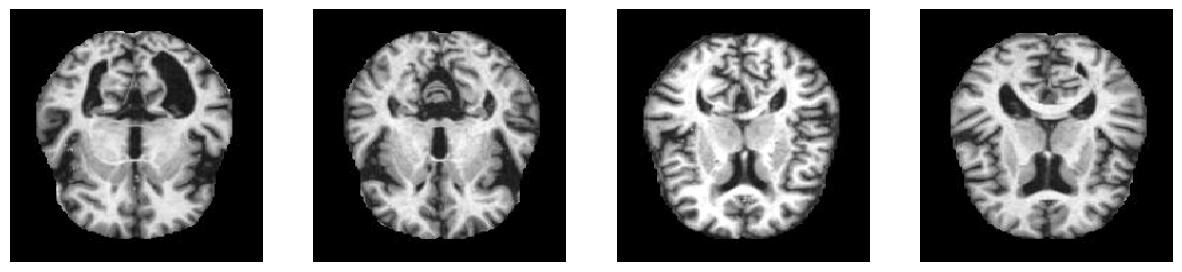

In [22]:
al_train_dg = datagen.flow_from_directory(
                  directory='../data/alzheimer/train',
                  target_size=(image_size, image_size), # resize to this size
                  color_mode="grayscale", # for coloured images
                  batch_size=1, # number of images to extract from folder for every batch
                  class_mode="categorical", # classes to predict
                  seed=18,
                  shuffle=True,
                  subset='training'
                  )

al_val_dg = datagen.flow_from_directory(
                  directory='../data/alzheimer/train',
                  target_size=(image_size, image_size), # resize to this size
                  color_mode="grayscale", # for coloured images
                  batch_size=1, # number of images to extract from folder for every batch
                  class_mode="categorical", # classes to predict
                  seed=18,
                  shuffle=True,
                  subset='validation'
                  )



fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15))

for i in range(4):
    # convert to unsigned integers for plotting
    image = next(al_train_dg)[0].astype('uint8')

    # changing size from (1, 200, 200, 3) to (200, 200, 3) for plotting the image
    image = np.squeeze(image)

    # plot raw pixel data
    ax[i].imshow(image, cmap='gray')
    ax[i].axis('off')

In [23]:
es = EarlyStopping(patience = 5)

model = Sequential()


model.add(layers.Input(shape=(image_size, image_size, 1)))
model.add(layers.Rescaling(1./255))

#First Convolution
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Second Convolution
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Flatten
model.add(Flatten())
# Fully Connected
model.add(Dense(32, activation = 'relu'))
model.add(Dense(4, activation='softmax'))

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h = model.fit(al_train_dg, validation_data = al_val_dg, steps_per_epoch=len(al_train_dg) / 32, epochs=50, callbacks = [es])

Epoch 1/50
128/128 [==============================] - 43s 298ms/step - loss: 1.3263 - accuracy: 0.5039 - val_loss: 1.0373 - val_accuracy: 0.5005
Epoch 2/50
128/128 [==============================] - 37s 287ms/step - loss: 1.0837 - accuracy: 0.5039 - val_loss: 1.0612 - val_accuracy: 0.5005
Epoch 3/50
128/128 [==============================] - 36s 280ms/step - loss: 1.1011 - accuracy: 0.4884 - val_loss: 1.0418 - val_accuracy: 0.5005
Epoch 4/50
128/128 [==============================] - 35s 273ms/step - loss: 1.0201 - accuracy: 0.5271 - val_loss: 1.0466 - val_accuracy: 0.5005
Epoch 5/50
128/128 [==============================] - 37s 286ms/step - loss: 1.0560 - accuracy: 0.4884 - val_loss: 1.0443 - val_accuracy: 0.5005
Epoch 6/50
128/128 [==============================] - 36s 279ms/step - loss: 0.9756 - accuracy: 0.5349 - val_loss: 1.0829 - val_accuracy: 0.5005


# Brain Tumor

In [4]:
# ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=1, #rotate images
        width_shift_range=0.05,
        height_shift_range=0.05, #shift image in horizontal and vertical
        horizontal_flip=True,
        validation_split=0.20) # brightness

Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.


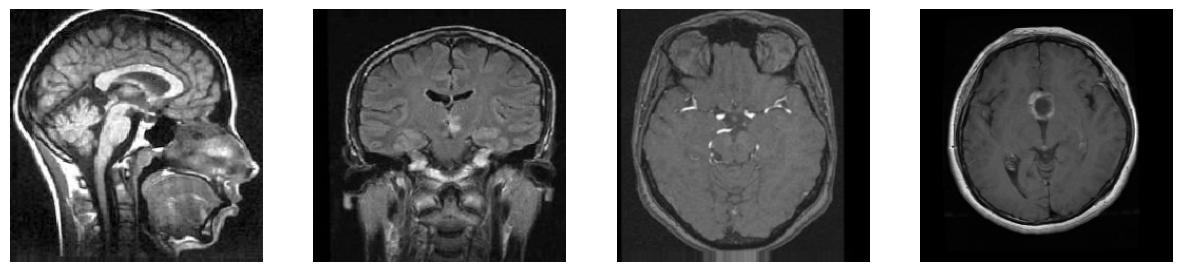

In [9]:
bt_train_dg = datagen.flow_from_directory(
                  directory='../data/brain_tumor/train',
                  target_size=(image_size, image_size), # resize to this size
                  color_mode="grayscale", # for coloured images
                  batch_size=1, # number of images to extract from folder for every batch
                  class_mode="categorical", # classes to predict
                  seed=18,
                  shuffle=True,
                  subset='training'
                  )

bt_val_dg = datagen.flow_from_directory(
                  directory='../data/brain_tumor/train',
                  target_size=(image_size, image_size), # resize to this size
                  color_mode="grayscale", # for coloured images
                  batch_size=1, # number of images to extract from folder for every batch
                  class_mode="categorical", # classes to predict
                  seed=18,
                  shuffle=True,
                  subset='validation'
                  )



fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15))

for i in range(4):
    # convert to unsigned integers for plotting
    image = next(bt_train_dg)[0].astype('uint8')

    # changing size from (1, 200, 200, 3) to (200, 200, 3) for plotting the image
    image = np.squeeze(image)

    # plot raw pixel data
    ax[i].imshow(image, cmap='gray')
    ax[i].axis('off')

In [10]:
es = EarlyStopping(patience = 5)
model = Sequential()
model.add(layers.Input(shape=(image_size, image_size, 1)))
model.add(layers.Rescaling(1./255))
model.add(Conv2D(64,kernel_size = (2,2),strides = (1,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(64,kernel_size = (2,2),strides = (1,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(128,kernel_size = (2,2),strides = (1,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(256,kernel_size = (2,2),strides = (1,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(512,kernel_size = (2,2),strides = (1,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(256, activation="linear"))
model.add(Dense(4, activation='softmax'))
# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h = model.fit(bt_train_dg, validation_data = bt_val_dg, steps_per_epoch=len(bt_train_dg) / 32, epochs=50, callbacks = [es])

Epoch 1/50
71/71 [==============================] - 71s 917ms/step - loss: 1.6004 - accuracy: 0.2917 - val_loss: 1.3838 - val_accuracy: 0.2862
Epoch 2/50
71/71 [==============================] - 67s 928ms/step - loss: 1.3847 - accuracy: 0.3333 - val_loss: 1.3718 - val_accuracy: 0.2862
Epoch 3/50
71/71 [==============================] - 68s 953ms/step - loss: 1.3894 - accuracy: 0.2778 - val_loss: 1.3682 - val_accuracy: 0.2880
Epoch 4/50
71/71 [==============================] - 67s 933ms/step - loss: 1.3778 - accuracy: 0.3056 - val_loss: 1.3635 - val_accuracy: 0.2880
Epoch 5/50
72/71 [==============================] - ETA: 0s - loss: 1.3444 - accuracy: 0.3056

KeyboardInterrupt: 

In [46]:
image_size = 256

In [105]:
def read_grey_images_to_rgb(path, train_test = True):
    '''
    Read Greyscale images from a directory and convert them to RGB
    Input: 
    path - str, the path to the images
    train_test - bool, Default True. Controls the spliting of the data, if False - no split
    Return: X_train, X_val, y_train, y_val - four arrays ready for TensorFlow models (if train_test = True) or X_test, y_test - two arrays ready for predicting
    '''
    X = []
    y = []

    # Labels from the folder names
    for num_label, label in enumerate(listdir(path)):
        # Change each image and append to X and y
        for image in listdir(f'{path}/{label}'):
            if '.jpg' in image:
                img = read_file(f'{path}/{label}/{image}')  
                img = decode_jpeg(img, channels=1)
                img = resize(img,[image_size, image_size])
                img = convert_to_tensor(img[:,:,:1])
                # Make image RGB for pre-trained models
                img = grayscale_to_rgb(img, name=None)
                X.append(img)
                y.append(num_label)
    # For training the model
    if train_test:
        X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=18, stratify=y) 
        
        # Change for TensorFlow models
        X_train = np.array(X_train, dtype='float32')
        X_val = np.array(X_val, dtype='float32')

        y_train = to_categorical(y_train, num_classes=4, dtype='float32')
        y_val = to_categorical(y_val, num_classes=4, dtype='float32')

        return X_train, X_val, y_train, y_val
    # For testing
    else:
        X_test = np.array(X, dtype='float32')
        y_test = to_categorical(y, num_classes=4, dtype='float32')
        return X_test, y_test

In [106]:
# The path to the training set
bt_path_train = '../data/brain_tumor/train'

In [107]:
# Read the images, convert to greyscale and prepare for Tensorflow models
X_train, X_val, y_train, y_val = read_grey_images_to_rgb('../data/alzheimer/train')

# Check the shape of the data
X_train.shape, y_train.shape

((3840, 256, 256, 3), (3840, 4))

In [61]:
# Prepare the training data for predictions
X_test, y_test = read_grey_images_to_rgb('../data/alzheimer/test', train_test = False)

# Check the shape of the data
X_test.shape, y_test.shape

((1279, 256, 256, 3), (1279, 4))

In [ ]:
X = []
y = []

# Labels from the folder names
for num_label, label in enumerate(listdir(path)):
    # Change each image and append to X and y
    for image in listdir(f'{path}/{label}'):
        if '.jpg' in image:
            img = read_file(f'{path}/{label}/{image}')  
            img = decode_jpeg(img, channels=1)
            img = resize(img,[image_size, image_size])
            img = convert_to_tensor(img[:,:,:3])
            # Make image RGB for pre-trained models
            img = grayscale_to_rgb(img, name=None)
            X.append(img)
            y.append(num_label)

Found 394 files belonging to 4 classes.


In [11]:
import albumentations as A
import cv2

In [12]:
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.GaussNoise(p=0.25)
])

In [13]:
from tensorflow.math import confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
import numpy as np
from sklearn.metrics import accuracy_score
from os import listdir
from tensorflow.image import grayscale_to_rgb
from tensorflow import convert_to_tensor
from tensorflow.io import read_file, decode_jpeg
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize

In [147]:
path = '../data/alzheimer/train'

In [148]:
X = []
y = []

for num_label, label in enumerate(listdir(path)):
        # Change each image and append to X and y
        for image in listdir(f'{path}/{label}'):
            if '.jpg' in image:
                image = cv2.imread(f'{path}/{label}/{image}')  
                image = cv2.resize(image, (256, 256))

                X.append(image)
                y.append(num_label)

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=18, stratify=y) 
        
# Change for TensorFlow models

for image in X_val:
    image = convert_to_tensor(image[:,:,:1])
    # Make image RGB for pre-trained models
    image = grayscale_to_rgb(image, name=None)
    
X_val = np.array(X_val, dtype='float32')


y_val = to_categorical(y_val, num_classes=4, dtype='float32')


In [149]:
X_val.shape

(1281, 256, 256, 3)

In [150]:
X_aug = X_train.copy()

In [152]:
for image in X_aug:
    image = transform(image=image)['image']
    image = convert_to_tensor(image[:,:,:1])
    image = grayscale_to_rgb(image, name=None)

In [153]:
X_train = X_train + X_aug

In [154]:
y_train = y_train + y_train

In [155]:
X_train = np.array(X_train, dtype='float32')

In [156]:
y_train = to_categorical(y_train, num_classes=4, dtype='float32')

In [157]:
X_train.shape

(7680, 256, 256, 3)

In [158]:
y_train.shape

(7680, 4)

In [162]:
image_size = 256

In [163]:
from tensorflow.keras.applications import resnet50

rn_model = resnet50.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(image_size, image_size, 3),
    classes=4,
    classifier_activation="softmax"
)

In [164]:
# Freeze last 5 layers
for layer in rn_model.layers:
    layer.trainable = False

In [165]:
es = EarlyStopping(patience = 5, restore_best_weights=True)

model = Sequential()

model.add(rn_model)
model.add(Flatten())

#Just use a single output layer
model.add(Dense(4, activation='softmax'))

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h_rn = model.fit(X_train, y_train, validation_data = (X_val, y_val), steps_per_epoch=len(X_train) / 32, epochs=50, callbacks = [es])

Epoch 1/50
240/240 [==============================] - 1302s 5s/step - loss: 2.9683 - accuracy: 0.7116 - val_loss: 1.2450 - val_accuracy: 0.8361
Epoch 2/50
240/240 [==============================] - 1283s 5s/step - loss: 0.5897 - accuracy: 0.9126 - val_loss: 0.7272 - val_accuracy: 0.8884
Epoch 3/50
240/240 [==============================] - 1857s 8s/step - loss: 0.1143 - accuracy: 0.9732 - val_loss: 0.9801 - val_accuracy: 0.8720
Epoch 4/50
240/240 [==============================] - 1888s 8s/step - loss: 0.1620 - accuracy: 0.9677 - val_loss: 4.2488 - val_accuracy: 0.6612
Epoch 5/50
240/240 [==============================] - 1895s 8s/step - loss: 0.9812 - accuracy: 0.9299 - val_loss: 2.5606 - val_accuracy: 0.8056
Epoch 6/50
240/240 [==============================] - 1873s 8s/step - loss: 0.1938 - accuracy: 0.9693 - val_loss: 1.0772 - val_accuracy: 0.8946
Epoch 7/50
240/240 [==============================] - 1827s 8s/step - loss: 0.6702 - accuracy: 0.9504 - val_loss: 1.2138 - val_accuracy:

In [172]:
path = '../data/alzheimer/test'
X = []
y = []


# Labels from the folder names
for num_label, label in enumerate(listdir(path)):   
    # Change each image and append to X and y
    for image in listdir(f'{path}/{label}'):
        if '.jpg' in image:
            img = read_file(f'{path}/{label}/{image}')  
            img = decode_jpeg(img, channels=1)
            img = resize(img,[image_size, image_size])
            img = convert_to_tensor(img[:,:,:1])
            # Make image RGB for pre-trained models
            img = grayscale_to_rgb(img, name=None)
            X.append(img)
            y.append(num_label)
X_test = np.array(X, dtype='float32')
y_test = to_categorical(y, num_classes=4, dtype='float32')
        

In [173]:
X_test.shape

(1279, 256, 256, 3)

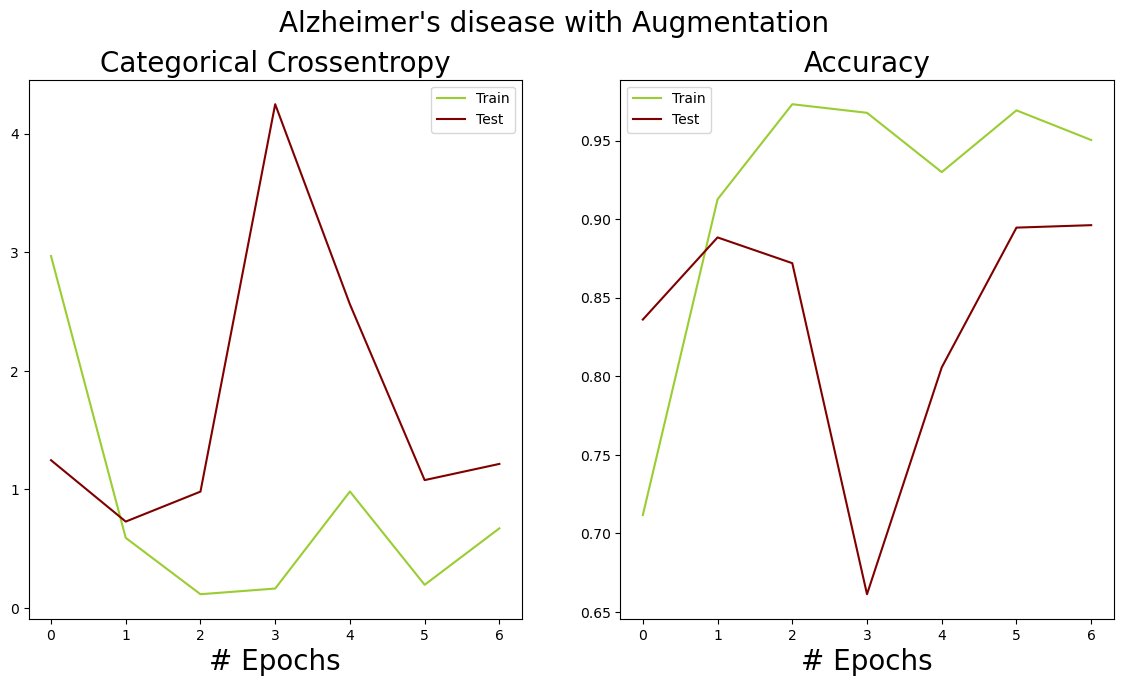

In [170]:
# Plot Crossentropy and Accuracy by epoch
functions.evaluation_plots(h_rn, 'Alzheimer\'s disease with Augmentation')

Accuracy_score: 0.8884 



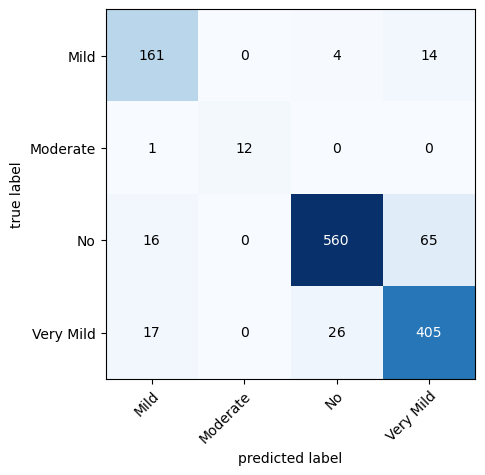

In [169]:
# Testing set Plot Confusion Matrix and print Accuracy
acc_conf_matrix(model, X=X_val, y=y_val, class_names_list =  ['Mild', 'Moderate', 'No', 'Very Mild'])

Accuracy_score: 0.6427 



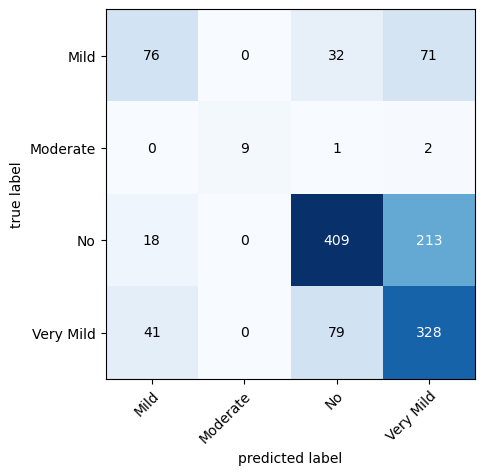

In [174]:
# Testing set Plot Confusion Matrix and print Accuracy
functions.acc_conf_matrix(model, X=X_test, y=y_test, class_names_list =  ['Mild', 'Moderate', 'No', 'Very Mild'])

Augmentation did not improve the accuracy of the model. Without Augmentation accuracy was 0.67

In [ ]:
def acc_conf_matrix(model, val_data=None, X=None, y=None, class_names_list = None):
    '''
    '''
    # Generate Confusion Matrix
    predictions = np.array([])
    labels =  np.array([])
    if val_data == None:
        predictions = np.concatenate([predictions, model.predict(X, verbose = False).argmax(axis=1)])
        labels = np.concatenate([labels, np.argmax(y, axis=-1)])

    else:
        for x, y in val_data:
            predictions = np.concatenate([predictions, model.predict(x, verbose = False).argmax(axis=1)])
            labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])
    cm = confusion_matrix(labels=labels, predictions=predictions).numpy()
    # Print Accuracy score
    acc = round(accuracy_score(labels, predictions), 4)
    print(f'Accuracy_score: {acc} \n') 
    # Plot the confusion matrix
    if class_names_list:
        fig, ax = plot_confusion_matrix(cm, class_names=class_names_list)    
    else:
        fig, ax = plot_confusion_matrix(cm, class_names=val_data.class_names)    
    

In [64]:
def acc_conf_matrix(model, val_data=None, X=None, y=None, class_names_list = None):
    '''
    '''
    # Generate Confusion Matrix
    predictions = np.array([])
    labels =  np.array([])
    
    predictions = np.concatenate([predictions, model.predict(X, verbose = False).argmax(axis=1)])
    labels = np.concatenate([labels, np.argmax(y, axis=-1)])


    cm = confusion_matrix(labels=labels, predictions=predictions).numpy()
    # Print Accuracy score
    acc = round(accuracy_score(labels, predictions), 4)
    print(f'Accuracy_score: {acc} \n') 
    # Plot the confusion matrix
    fig, ax = plot_confusion_matrix(cm, class_names=class_names_list)  
    

Accuracy_score: 0.3497 



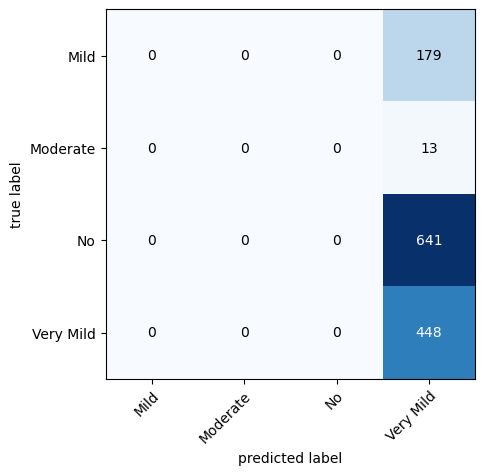

In [65]:
# Testing set Plot Confusion Matrix and print Accuracy
acc_conf_matrix(model, X=X_val, y=y_val, class_names_list =  ['Mild', 'Moderate', 'No', 'Very Mild'])

In [55]:
es = EarlyStopping(patience = 5, restore_best_weights=True)

model = Sequential()

model.add(rn_model)
model.add(Flatten())

#Just use a single output layer
model.add(Dense(4, activation='softmax'))

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h_rn = model.fit(X, y, validation_data = (X_val, y_val), steps_per_epoch=len(X_train) / 32, epochs=50, callbacks = [es])

Epoch 1/50
  1/280 [..............................] - ETA: 34:22 - loss: 3.5108 - accuracy: 0.2188

KeyboardInterrupt: 

In [ ]:
# Testing set Plot Confusion Matrix and print Accuracy
acc_conf_matrix(model, X=X_test, y=y_test, class_names_list =  ['Mild', 'Moderate', 'No', 'Very Mild'])